<a href="https://colab.research.google.com/github/hamidanwar/AI-Lab-Tasks/blob/main/AIFinalLab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name: Hamid Anwar**

**Reg no: SP23-BSE-124**
# **Question 1**


In [ ]:
!wget https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv


--2025-12-17 04:51:17--  https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0s      

2025-12-17 04:51:17 (130 MB/s) - ‘diabetes.csv’ saved [23873/23873]



In [ ]:
!ls


diabetes.csv  sample_data


In [ ]:
import pandas as pd
df = pd.read_csv('diabetes.csv')
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load dataset (upload diabetes.csv in Colab)
df = pd.read_csv('/content/diabetes.csv')

# Handle missing values
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
df[cols] = df[cols].replace(0, np.nan)
df.fillna(df.mean(), inplace=True)

# Split features and label
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})

results


,Metric,Score
0,Accuracy,0.753247
1,Precision,0.666667
2,Recall,0.618182
3,F1-Score,0.641509


# **Question 2**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 76ms/step - accuracy: 0.8622 - loss: 0.4815 - val_accuracy: 0.9697 - val_loss: 0.1046
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.9740 - loss: 0.0911 - val_accuracy: 0.9799 - val_loss: 0.0711
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.9849 - loss: 0.0527 - val_accuracy: 0.9812 - val_loss: 0.0622
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 74ms/step - accuracy: 0.9884 - loss: 0.0391 - val_accuracy: 0.9824 - val_loss: 0.0572
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 69ms/step - accuracy: 0.9915 - loss: 0.0296 - val_accuracy: 0.9822 - val_loss: 0.0554
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9940 - loss: 0.0213 - val_accuracy: 0.9834 - val_loss: 0.0554
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 24s 65ms/step - accuracy: 0.9957 - loss: 0.0147 - val_accuracy: 0.9832 - val_loss: 0.0613
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9959 - loss: 0.0132 - 

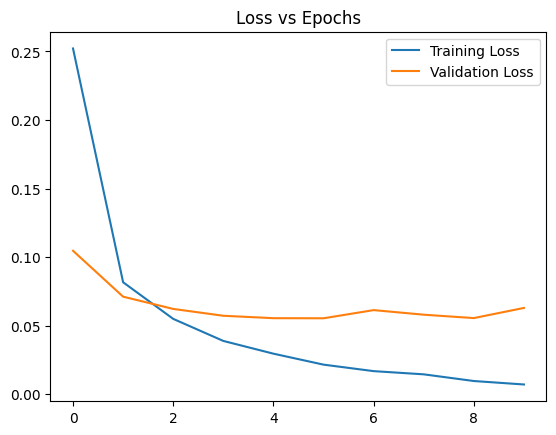

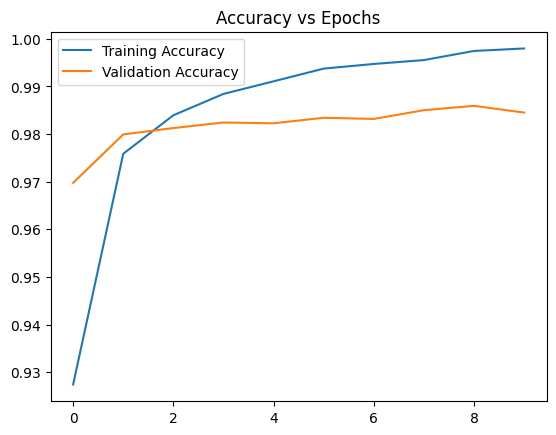

In [ ]:
# Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Build CNN model
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
history = cnn_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

# Plot Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy vs Epochs')
plt.show()

# Save model
cnn_model.save('mnist_cnn_model.h5')


# **Question 3:**

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 68ms/step - accuracy: 0.8630 - loss: 0.4804 - val_accuracy: 0.9749 - val_loss: 0.1008
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 67ms/step - accuracy: 0.9758 - loss: 0.0847 - val_accuracy: 0.9804 - val_loss: 0.0676
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9839 - loss: 0.0547 - val_accuracy: 0.9820 - val_loss: 0.0627
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.9888 - loss: 0.0383 - val_accuracy: 0.9835 - val_loss: 0.0555
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 67ms/step - accuracy: 0.9926 - loss: 0.0259 - val_accuracy: 0.9847 - val_loss: 0.0526
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.9938 - loss: 0.0218 - val_accuracy: 0.9838 - val_loss: 0.0537
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9955 - loss: 0.0153 - val_accuracy: 0.9851 - val_loss: 0.0500
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.9966 - loss: 0.0122 - 

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 94ms/step - accuracy: 0.6295 - loss: 1.1019 - val_accuracy: 0.9507 - val_loss: 0.1585
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 35s 92ms/step - accuracy: 0.9573 - loss: 0.1387 - val_accuracy: 0.9747 - val_loss: 0.0864
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.9741 - loss: 0.0823 - val_accuracy: 0.9800 - val_loss: 0.0667
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.9812 - loss: 0.0605 - val_accuracy: 0.9763 - val_loss: 0.0691
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 93ms/step - accuracy: 0.9840 - loss: 0.0506 - val_accuracy: 0.9845 - val_loss: 0.0489
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9881 - loss: 0.0382 - val_accuracy: 0.9881 - val_loss: 0.0403
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 97ms/step - accuracy: 0.9907 - loss: 0.0303 - val_accuracy: 0.9857 - val_loss: 0.0452
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 89ms/step - accuracy: 0.9913 - loss: 0.0284 - 

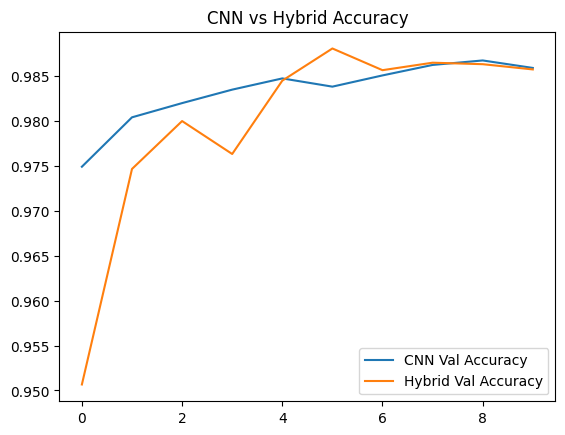

In [7]:
# ==============================
# IMPORT LIBRARIES
# ==============================
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Reshape, LSTM
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# ==============================
# LOAD & PREPROCESS DATA
# ==============================
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# ==============================
# Q2: CNN MODEL
# ==============================
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

cnn_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn_history = cnn_model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

cnn_loss, cnn_acc = cnn_model.evaluate(X_test, y_test_cat)
print("CNN Test Accuracy:", cnn_acc)
print("CNN Test Loss:", cnn_loss)

# Confusion Matrix CNN
cnn_pred = np.argmax(cnn_model.predict(X_test), axis=1)
cnn_cm = confusion_matrix(y_test, cnn_pred)
print("CNN Confusion Matrix:\n", cnn_cm)

# ==============================
# Q3: HYBRID CNN + LSTM MODEL
# ==============================
hybrid_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Reshape((13, 13*32)),   # sequence for LSTM
    LSTM(64),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

hybrid_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

hybrid_history = hybrid_model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2
)

hybrid_loss, hybrid_acc = hybrid_model.evaluate(X_test, y_test_cat)
print("Hybrid Test Accuracy:", hybrid_acc)
print("Hybrid Test Loss:", hybrid_loss)

# Confusion Matrix Hybrid
hybrid_pred = np.argmax(hybrid_model.predict(X_test), axis=1)
hybrid_cm = confusion_matrix(y_test, hybrid_pred)
print("Hybrid Confusion Matrix:\n", hybrid_cm)

# ==============================
# COMPARISON PLOT
# ==============================
plt.plot(cnn_history.history['val_accuracy'], label='CNN Val Accuracy')
plt.plot(hybrid_history.history['val_accuracy'], label='Hybrid Val Accuracy')
plt.legend()
plt.title('CNN vs Hybrid Accuracy')
plt.show()

# ==============================
# SAVE MODELS
# ==============================
cnn_model.save("cnn_mnist_model.h5")
hybrid_model.save("hybrid_cnn_lstm_mnist_model.h5")
